In [169]:
#This notebook is used for eda
#import library
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [170]:
#Load Data
orders = pd.read_csv('./data/Orders.csv')
orders_df = orders.copy()
orders_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [171]:

#Problem 1
#Clean Data, Remove $ , . and turn text to numeric
orders_df['Profit'] = orders_df['Profit'].apply(lambda x: x.replace('$',''))
orders_df['Profit'] = orders_df['Profit'].apply(lambda x: x.replace('$',''))
orders_df['Sales'] = orders_df['Sales'].apply(lambda x: x.replace('$',''))
orders_df['Profit'] = orders_df['Profit'].apply(lambda x: x.replace(',',''))
orders_df['Sales'] = orders_df['Sales'].apply(lambda x: x.replace(',',''))
orders_df['Profit'] = orders_df['Profit'].apply(lambda x: x.replace('.',''))
orders_df['Sales'] = orders_df['Sales'].apply(lambda x: x.replace('.',''))
orders_df['Profit'] = pd.to_numeric(orders_df['Profit'])
orders_df['Sales'] = pd.to_numeric(orders_df['Sales'])
orders_df.head()


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,22198,2,0.0,6215,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",370940,9,0.1,-28877,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",517517,9,0.1,91997,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",289251,5,0.1,-9654,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",283296,8,0.0,31152,903.04,Critical


In [172]:
#Problem 2
#Format date a datetime object
from datetime import datetime
orders_df['Order.Date'] = orders_df['Order.Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))



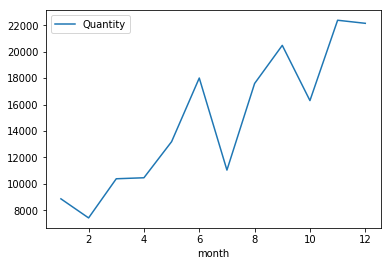

In [183]:
#Seasonal Trend for Inventory
#Convert Date to month
orders_df['month'] = orders_df['Order.Date'].apply(lambda x: x.month)
orders_df['year'] = orders_df['Order.Date'].apply(lambda x: x.year)
orders_df['Quantity'] = pd.to_numeric(orders_df['Quantity'])
orders_group = orders_df.groupby(['month'])
orders_sum = pd.DataFrame(orders_group.Quantity.sum())
orders_sum = orders_sum.reset_index()

#Seasonal Trend for Inventory Plot
orders_sum.plot(x='month',y='Quantity')




C:\Users\Joe Fritch\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


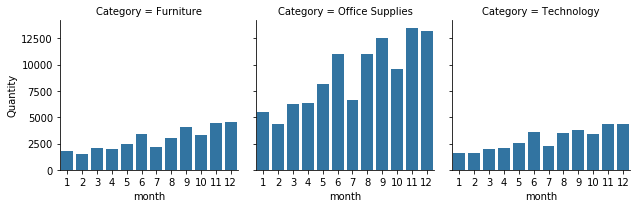

In [179]:
#Seasonal Trend for Categories
#Convert Date to month
orders_group = orders_df.groupby(['Category','month'])
orders_sum1 = pd.DataFrame(orders_group.Quantity.sum())
orders_sum1 = orders_sum1.reset_index()
orders_sum1

#Seasonal Trend for Inventory Plot
fg = sns.FacetGrid(orders_summ1,col="Category")
fg = fg.map(sns.barplot,'month','Quantity')
#Seasonal Trend for Inventory Plot
#train_summ1.plot(subplots=True)






In [184]:
#Problem 3
#Load Data
returns = pd.read_csv('./data/returns.csv')
returns_df = returns.copy()
returns_df.head()


,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [192]:
#Profits lost each year due to returns
returns_df['Order.ID'] = returns_df['Order ID']
returns_df.drop('Order ID', axis = 1)
combined_df = pd.merge(returns_df, orders_df, on='Order.ID')
Return_prof = pd.DataFrame(combined_df.groupby('year')['Profit'].sum()).reset_index()
print('Sum of profits lost per year due to returns:')
print(Return_prof)

#Number Customers Returned more than 1 item
Return_cust = pd.DataFrame(combined_df.groupby('Customer.ID')['Returned'].count()).reset_index()
mask = Return_cust['Returned']>1
Return_cust_1 = Return_cust.loc[mask,:]
print('Customers with more than one return:', Return_cust_1['Returned'].count())

#Number Customers Returned more than 5 item
mask = Return_cust['Returned']>5
Return_cust_5 = Return_cust.loc[mask,:]
print('Customers with more than five return:', Return_cust_5['Returned'].count())

#Which regions are more likely to make returns
Return_region = pd.DataFrame(combined_df.groupby('Region_x')['Returned'].count()).reset_index()
Return_region_1 = Return_region.sort_values(by='Returned',ascending = False).head()
print('Region with most returns:')
print(Return_region_1)

#Which categories are most likely to be returned
Return_cat = pd.DataFrame(combined_df.groupby('Category')['Returned'].count()).reset_index()
Return_cat_1 = Return_cat.sort_values(by='Returned',ascending = False).head()
print('Category with most returns:')
print(Return_cat_1)



Sum of profits lost per year due to returns:
   year   Profit
0  2012  1747726
1  2013   926989
2  2014  1751063
3  2015  1711297
Customers with more than one return: 547
Customers with more than five return: 46
Region with most returns:
             Region_x  Returned
2     Central America       248
22     Western Europe       233
23         Western US       180
12            Oceania       154
14  Southeastern Asia       140
Category with most returns:
          Category  Returned
1  Office Supplies      1348
2       Technology       445
0        Furniture       427


In [ ]:
#Q2
